<a href="https://colab.research.google.com/github/capitallatera/Statistics/blob/main/T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T-Test

In [12]:
import numpy as np  # linear algebra
import pandas as pd # data processing, csv file I\O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt  # more data visualization
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from scipy.stats import ttest_ind # for the t-test we'll be doing
from subprocess import check_output

In [13]:
# Are the amounts of sugar in cold ceral and hot cereal related?
cereal=pd.read_csv("/content/drive/MyDrive/cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [16]:
hot_cereal=cereal.loc[cereal['type']=="H",:]  # define a hot_cereal df
cold_cereal=cereal.loc[cereal['type']=="C",:]  # define a cold_cereal df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [17]:
ttest_ind(cold_cereal['sugars'],hot_cereal['sugars'],equal_var=False)

Ttest_indResult(statistic=4.994846451755555, pvalue=0.01874372013190692)

In [18]:
ttest_ind(hot_cereal['sugars'],cold_cereal['sugars'],equal_var=False)

Ttest_indResult(statistic=-4.994846451755555, pvalue=0.01874372013190692)

Look like our sugar are not the same! since the pvalue>.01,
we know that our null hypothesis (there is no correlation between the amount of sugars in and the amount of sugars in cold cereal)

In [20]:
# check the calories
ttest_ind(hot_cereal['calories'],cold_cereal['calories'],equal_var=False)

Ttest_indResult(statistic=-3.1070612896033047, pvalue=0.002691710812554955)

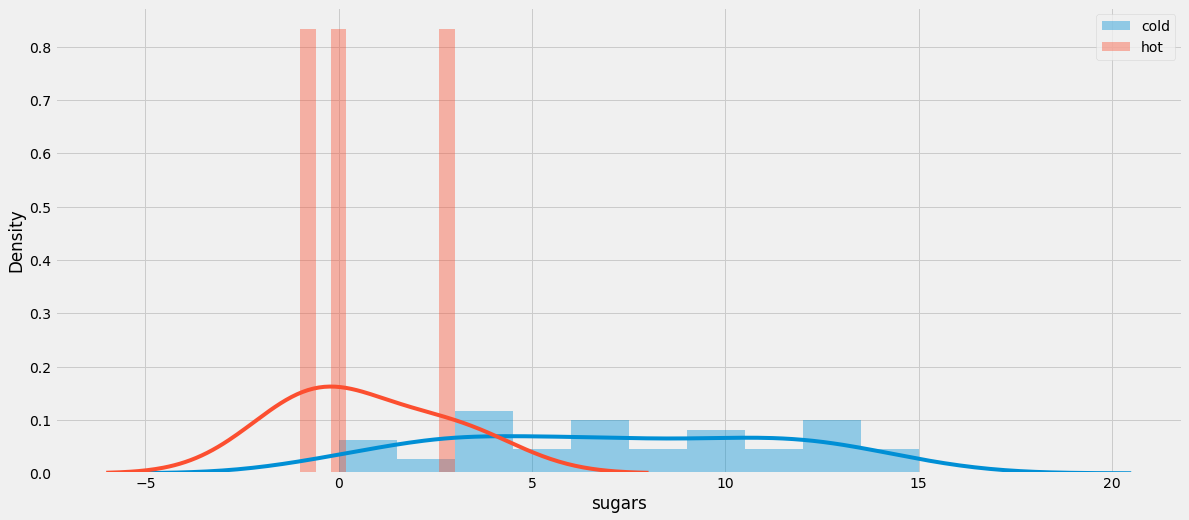

In [23]:
# let's Visualize,
ax=plt.subplots(figsize=(18,8))
# plot the cold cereal sugar distribution
sns.distplot(cold_cereal['sugars'],bins=10,hist=True,label='cold')
# plot the hot cereal sugar distribution
sns.distplot(hot_cereal['sugars'],bins=10,hist=True,label='hot')
plt.legend() # show legend
plt.show()